MAQUINA DE SOPORTE VECTORIAL

In [24]:
#importamos las bibliotecas de rigor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


Carga del Set de Datos

In [25]:


df = pd.read_csv('C:/Users/Guillermo/Documents/Inferencia_Estadistica_Grupo/BBDD/Clasificacion_banco.csv')#CAMBIEN EL 
#DIRECTORIO DEL ARCHIVO

# Ver las primeras filas del dataset
print(df.head())


   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

Se Preprocesan los datos con el objeto de mejorar la performance del MSV y achicar el universo usando PCA

In [26]:
# Convertir variables categóricas a variables dummy
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

# Separar características y la variable objetivo
X = df.drop(['not.fully.paid'], axis=1)
y = df['not.fully.paid']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Se Aplica PCA y se achica el set de datos

In [27]:
# Aplicar PCA
pca = PCA(n_components=0.90)  # Mantener el 90% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Ver la cantidad de componentes principales
print("Número de componentes principales:", pca.n_components_)


Número de componentes principales: 13


In [28]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [29]:
# Entrenar el modelo SVM
model = SVC(kernel='linear')  # Puedes probar otros kernels
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[2408    0]
 [ 466    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874



c:\Users\Guillermo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Guillermo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Guillermo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

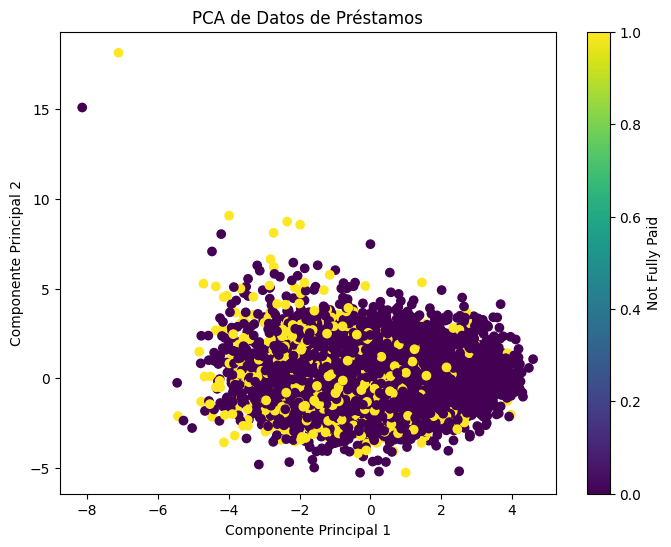

In [30]:
# Si seleccionas 2 componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de Datos de Préstamos')
plt.colorbar(label='Not Fully Paid')
plt.show()


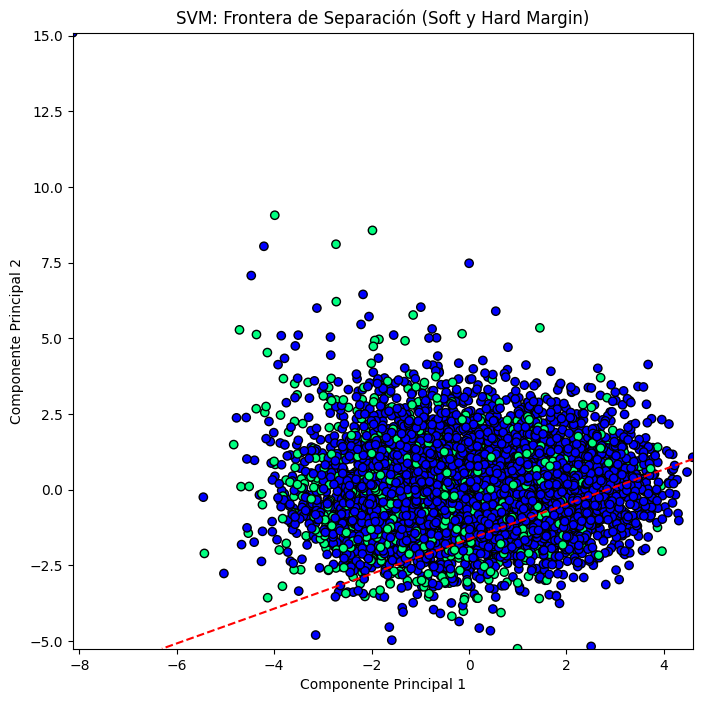

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

# Suponiendo que X_pca y y son las variables procesadas (PCA aplicado y etiquetas 'not.fully.paid')
X_2d = X_pca[:, :2]  # Solo tomamos las primeras dos componentes para el gráfico

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

# Entrenamos el modelo SVM con un kernel lineal
svm_model = svm.SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Coeficientes de la frontera (w) y el sesgo (b)
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

# Función que define la línea de separación
def fline(x1, w, b, offset=0):
    """Aplica la ecuación de la frontera de separación con margen"""
    x2 = (-w[0] * x1 - b + offset) / w[1]
    return x2

# Crear una malla de puntos para representar las zonas
xx, yy = np.meshgrid(np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 500),
                     np.linspace(np.min(X_train[:, 1]), np.max(X_train[:, 1]), 500))

# Predecir la clase de cada punto de la malla
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de los datos de entrenamiento
plt.figure(figsize=(8,8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='winter', edgecolors='k')

# Graficar las fronteras y márgenes
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='r')

# Ajustar el título y etiquetas
plt.title("SVM: Frontera de Separación (Soft y Hard Margin)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

# Mostrar el gráfico
plt.show()


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2500 and the array at index 2 has size 1

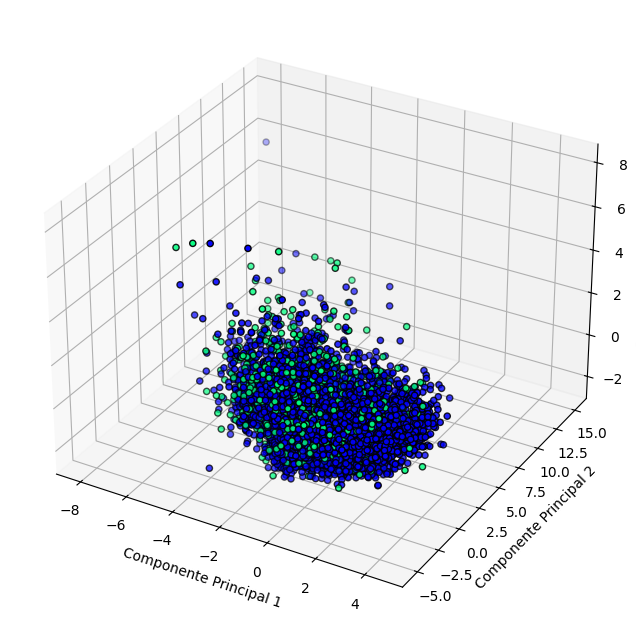

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

# Tomamos las primeras 3 componentes principales del PCA
X_3d = X_pca[:, :3]  # Usamos las tres primeras dimensiones

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_3d, y, test_size=0.3, random_state=42)

# Entrenamos un SVM con kernel lineal
svm_model = svm.SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Creamos una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujamos los puntos de entrenamiento en 3D
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='winter', edgecolor='k')

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Crear una malla de puntos para representar la zona
xx, yy = np.meshgrid(np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 50),
                     np.linspace(np.min(X_train[:, 1]), np.max(X_train[:, 1]), 50))

# Predecimos las clases en los puntos de la malla
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel(), np.mean(X_train[:, 2])])
Z = Z.reshape(xx.shape)

# Graficamos la frontera de separación en 3D
ax.contour3D(xx, yy, np.mean(X_train[:, 2]), Z, levels=[0], colors='red')

# Título del gráfico
ax.set_title('Separación de Clases en 3D: SVM')

# Mostrar el gráfico
plt.show()


TypeError: Input z must be 2D, not 3D

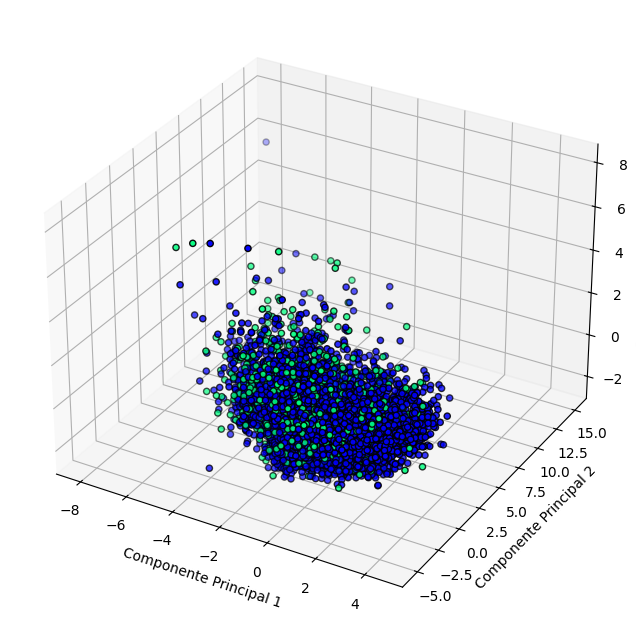

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

# Tomamos las primeras 3 componentes principales del PCA
X_3d = X_pca[:, :3]  # Usamos las tres primeras dimensiones

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_3d, y, test_size=0.3, random_state=42)

# Entrenamos un SVM con kernel lineal
svm_model = svm.SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Creamos una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujamos los puntos de entrenamiento en 3D
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='winter', edgecolor='k')

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Valores mínimos y máximos para los ejes
x1min, x1max = np.min(X_train[:, 0]), np.max(X_train[:, 0])
x2min, x2max = np.min(X_train[:, 1]), np.max(X_train[:, 1])
x3min, x3max = np.min(X_train[:, 2]), np.max(X_train[:, 2])

# Crear una malla tridimensional para representar la zona
xx, yy, zz = np.meshgrid(np.linspace(x1min, x1max, 50),
                         np.linspace(x2min, x2max, 50),
                         np.linspace(x3min, x3max, 50))

# Predecimos las clases en los puntos de la malla
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)

# Graficamos la frontera de separación en 3D
ax.contour3D(xx, yy, zz, Z, levels=[0], colors='red')

# Título del gráfico
ax.set_title('Separación de Clases en 3D: SVM')

# Mostrar el gráfico
plt.show()


MUCHA CONFUSION PARA SEPARAR CON MSV Y PCA, NO SE PUEDE ESTABLECER LAS LINEAS SOFT Y HARD EN 2D Y EN 3D NO SE PUEDE VER BIEN SI HAY SEPARACION DE QUIENES 
PAGAN COMPLETAMENTE Y QUIENES NO